In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

In [258]:
df = pd.read_csv("Customer_Churn_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [130]:
df.shape

(7043, 21)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [134]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [124]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [136]:
# Convert TotalCharges to numeric, fix empty strings
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True) 

In [150]:
# Drop customerID
df.drop(columns=['customerID'], inplace=True)

In [180]:
# Define categorical columns excluding the target
categorical_features = df.select_dtypes(include='object').columns.tolist()
categorical_features.remove('Churn')

In [ ]:
# Define numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('SeniorCitizen')  # optional: treat as categorical if needed

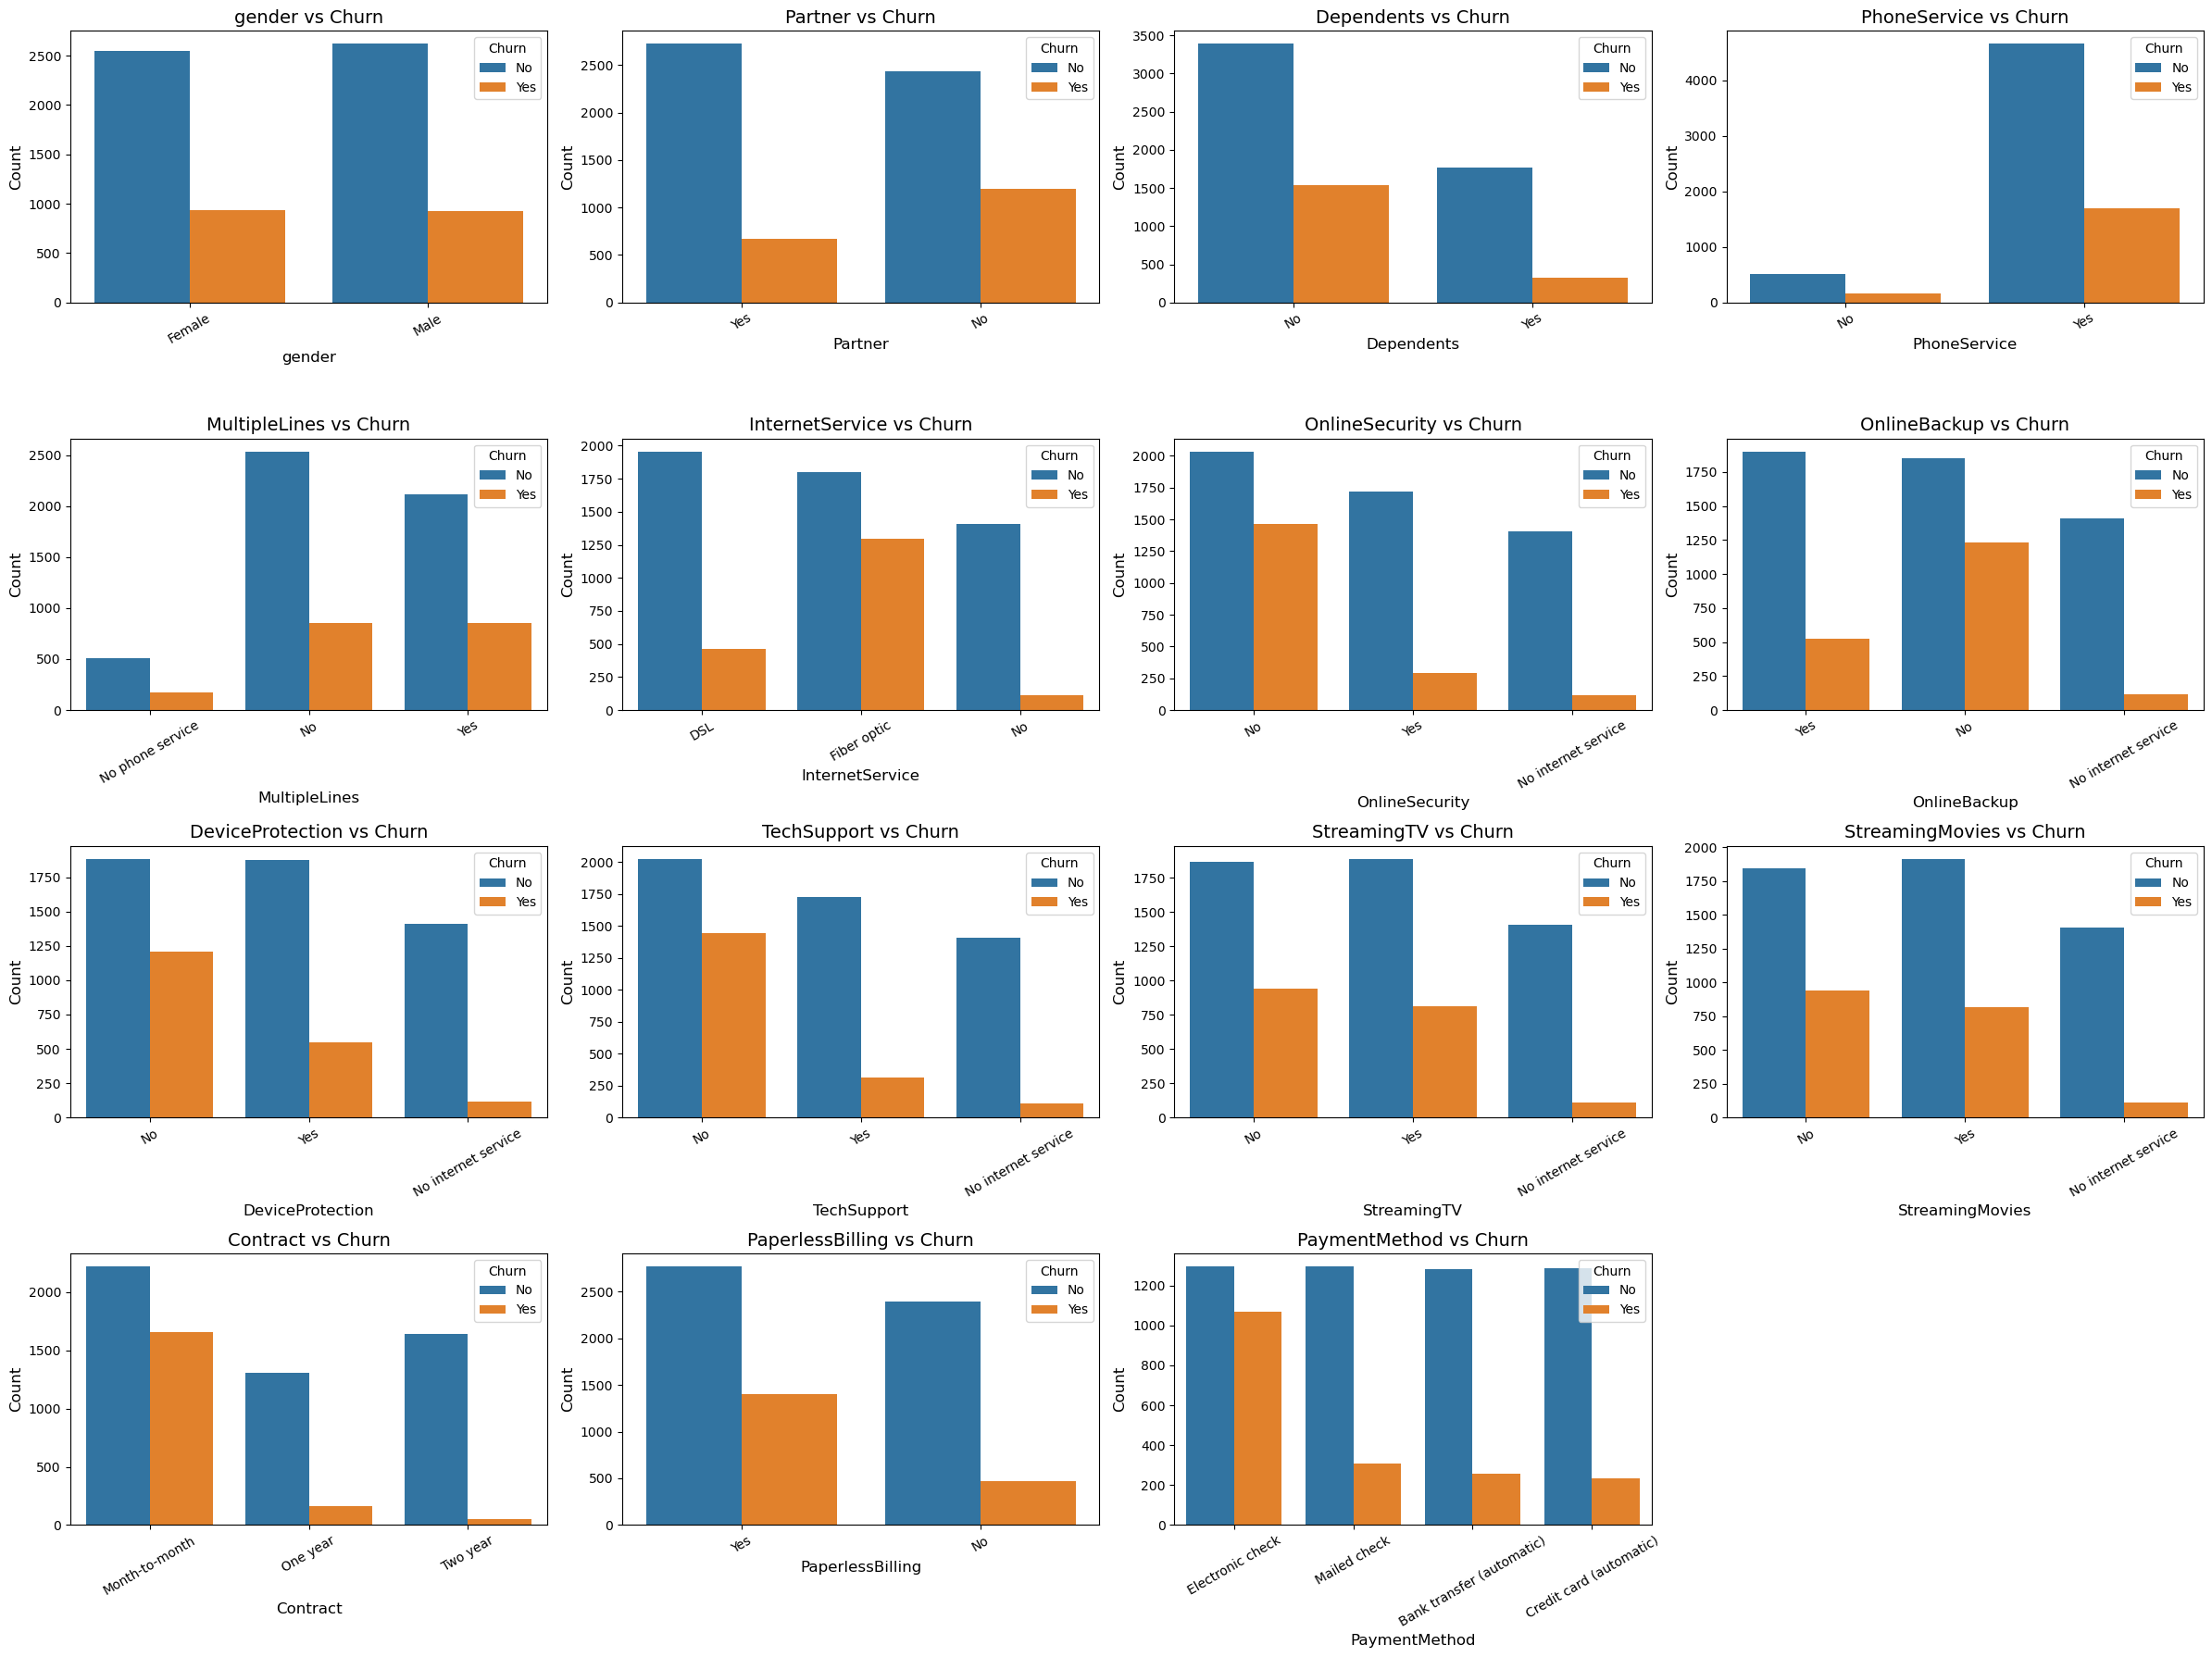

In [188]:
# Plotting: Countplots in subplots
plt.figure(figsize=(24, 18))  # Increased figure size

for i, col in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

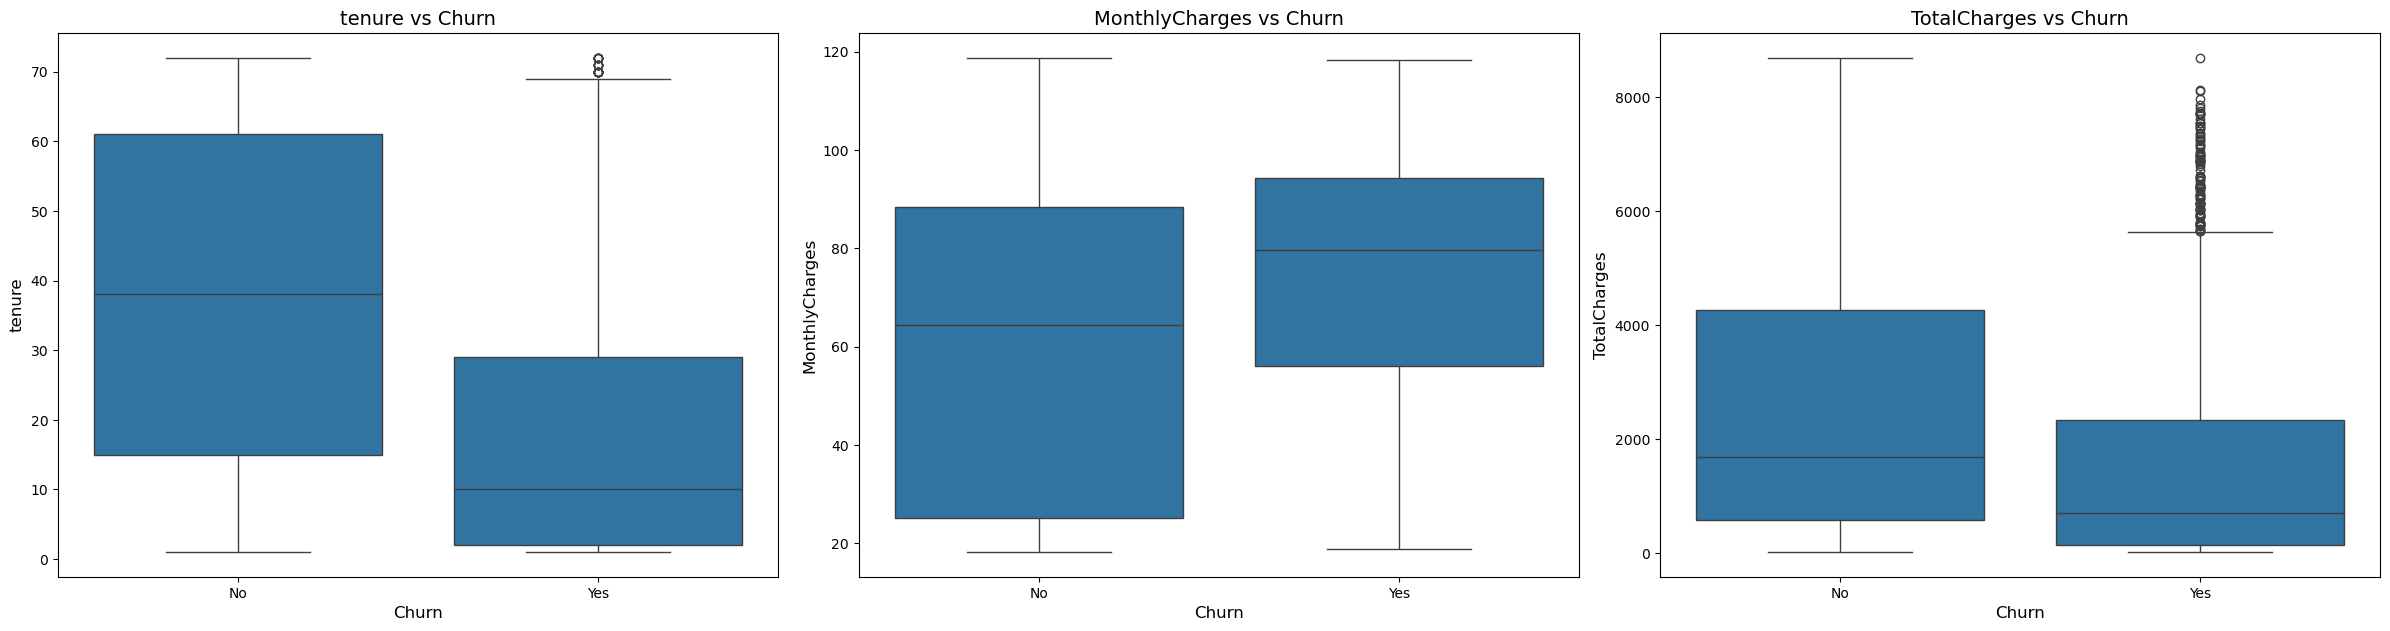

In [190]:
# Plotting: Boxplots in subplots (with better size and readability)
plt.figure(figsize=(24, 12))  # Bigger canvas

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn', fontsize=14)
    plt.xlabel('Churn', fontsize=12)
    plt.ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

In [232]:
# Label Encode all categorical features
label_enc = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col])

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [236]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [238]:
# Split into X (features) and y (target)
X = encoded_df.drop('Churn', axis = 1)
y = encoded_df['Churn']

In [240]:
# scaling
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Now when you split, X_train will be a DataFrame
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [242]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify =y, random_state  =42)

In [246]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1408,0.990658,-0.440327,1.035617,1.533025,1.327365,0.327189,1.116896,0.172835,1.408012,1.242875,1.245441,1.396963,-1.112632,-1.121501,1.574587,-1.206361,-0.537026,0.988963,1.674505
6992,0.990658,-0.440327,-0.965608,-0.652305,-0.261649,-3.056334,0.062666,-1.183614,-0.917837,-1.028998,1.245441,1.396963,-1.112632,-1.121501,-0.826735,-1.206361,0.399805,-0.965575,-0.556249
3349,-1.009430,-0.440327,1.035617,-0.652305,1.449597,0.327189,1.116896,0.172835,-0.917837,1.242875,1.245441,1.396963,-1.112632,-1.121501,1.574587,-1.206361,-0.537026,0.844367,1.771081
4486,0.990658,-0.440327,-0.965608,-0.652305,-1.198760,0.327189,-0.991564,0.172835,-0.917837,1.242875,-1.026988,-0.924267,-1.112632,1.137564,-0.826735,-1.206361,0.399805,0.648248,-0.903662
3535,-1.009430,-0.440327,1.035617,-0.652305,0.675462,-3.056334,0.062666,-1.183614,1.408012,-1.028998,-1.026988,-0.924267,1.146689,-1.121501,-0.826735,-1.206361,-1.473857,-0.802697,-0.093775


In [248]:
# Train Logistic Regression model
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [250]:
# Predict and Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [252]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7938877043354655
ROC AUC: 0.8345080265671349
Confusion Matrix:
 [[906 127]
 [163 211]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



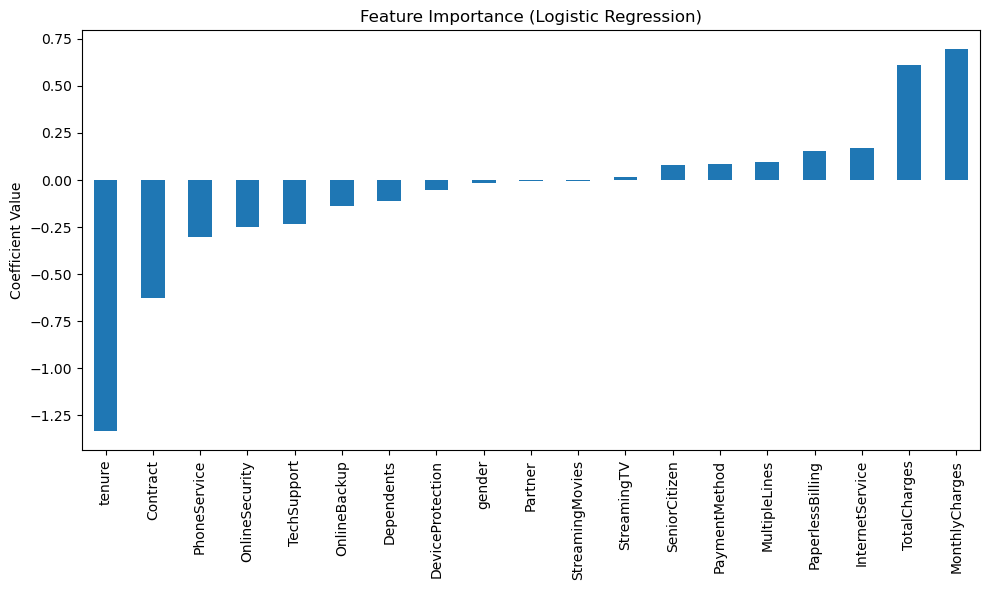

In [256]:
# Plot feature importance
importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=True)
plt.figure(figsize=(10, 6))
importance.plot(kind='bar')
plt.title("Feature Importance (Logistic Regression)")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()

In [260]:
import pickle

# Save the model
with open("churn_model.pkl", "wb") as file:
    pickle.dump(model, file)